# 📊 Exploratory Data Analysis (EDA)  📊
##         Piparo Federico

---


## Consigna: 📂

Debes realizar un análisis exploratorio de los datos en un notebook. Tienen que estar tus pasos documentados con claridad, con las conclusiones correspondientes en cada gráfico empleado y análisis de lo que vas observando, utilizando celdas Markdown para tal fin. La prolijidad del notebook será un aspecto a evaluar. Es importante que tengas en cuenta que, en muchas oportunidades y trabajos, un EDA constituye un entregable en sí mismo. En esta línea, hay varios aspectos indispensables que deben ser abordados en cualquier Análisis Exploratorio de Datos y tomaremos como punto de partida para evaluar tu performance en este apartado. Entre estos aspectos destacados se encuentran: búsqueda de valores faltantes, valores atípicos/extremos u outliers y registros duplicados. Asimismo, la utilización de gráficos coherentes según la tipología de variable que corresponda resulta esencial.

---



## Análisis Básicos (generales):


Lo primero será cargar las tablas en DataFrames. Trabajaremos con el documento obligatorio `Internet.xlsx` (al menos en esta primera instancia), que cuenta con 15 hojas. La primera decisión que tomé fue convertir cada una de estas hojas en un DataFrame individual, en lugar de trabajar con todo como un único DataFrame. Aunque algunos análisis podrían hacerse considerando todas las hojas juntas, creo que de esta manera tendré menos complicaciones a la hora de realizar análisis más profundos, por lo que me parece más inteligente trabajarlos por separado desde un comienzo. Aun que para estos análsis básicos, seguramente utilizaremos el conjunto de Dataframes, para comparar estos valores

Algunas de las hojas tenían nombres con espacios entre palabras, lo que dificultaba llamar a los DataFrames posteriormente. Por ello, manualmente cambié los espacios por guiones bajos ( _ ).








### importacion de librerias:

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #librería para graficos
import seaborn as sns  

Cargamos  `Internet.xlsx` (cada hoja en un DF diferente con su propio nombre)

In [7]:


# Cargar el archivo Excel con todas las hojas
excel_file = 'C:\\Users\\fede\\Desktop\\LABs 2\\tablas\\Internet.xlsx'
dfs = pd.read_excel(excel_file, sheet_name=None)

# Crear un DataFrame individual para cada hoja y asignarlo a una variable
for sheet_name, dataframe in dfs.items():
    globals()[f'DF_{sheet_name}'] = dataframe


### Chequeo de nulos y ceros(faltantes):

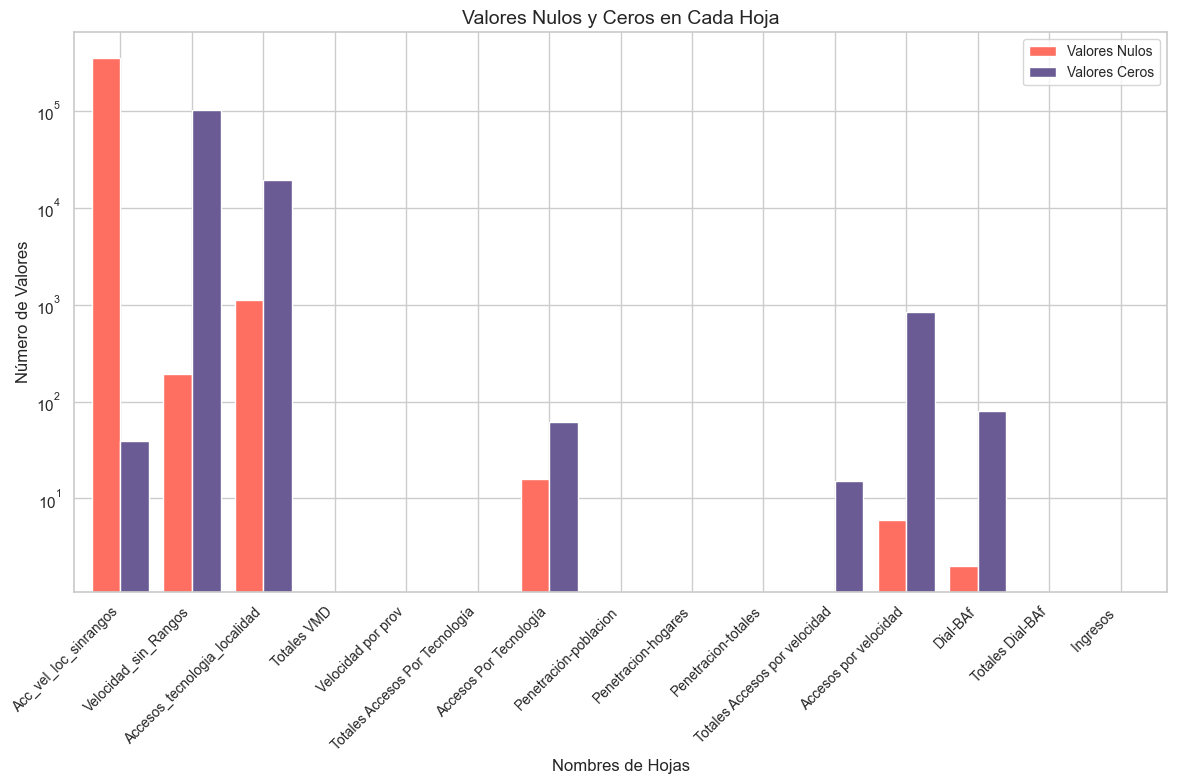

In [8]:

# Crear un DataFrame para almacenar la cantidad de nulos y ceros por hoja
conteo_nulos_y_ceros = pd.DataFrame(index=dfs.keys(), columns=['valores_nulos', 'valores_ceros'])

# Calcular los valores nulos y ceros para cada DataFrame
for nombre_hoja, df in dfs.items():
    conteo_nulos_y_ceros.loc[nombre_hoja, 'valores_nulos'] = df.isnull().sum().sum()
    conteo_nulos_y_ceros.loc[nombre_hoja, 'valores_ceros'] = (df == 0).sum().sum()

# Estilo de seaborn
sns.set(style="whitegrid")

# Crear un gráfico de barras con colores diferenciados
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar valores nulos y ceros
conteo_nulos_y_ceros.plot(kind='bar', ax=ax, color=['#FF6F61', '#6B5B95'], width=0.8)

# Personalizar el gráfico
plt.xlabel('Nombres de Hojas', fontsize=12)
plt.ylabel('Número de Valores', fontsize=12)
plt.title('Valores Nulos y Ceros en Cada Hoja', fontsize=14)
plt.yscale('log')  # Escala logarítmica
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(['Valores Nulos', 'Valores Ceros'], fontsize=10)
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [9]:
conteo_nulos_y_ceros.T 

,Acc_vel_loc_sinrangos,Velocidad_sin_Rangos,Accesos_tecnologia_localidad,Totales VMD,Velocidad por prov,Totales Accesos Por Tecnología,Accesos Por Tecnología,Penetración-poblacion,Penetracion-hogares,Penetracion-totales,Totales Accesos por velocidad,Accesos por velocidad,Dial-BAf,Totales Dial-BAf,Ingresos
valores_nulos,351902,192,1120,0,0,0,16,0,0,0,0,6,2,0,0
valores_ceros,39,100551,19350,0,0,0,61,0,0,0,15,840,80,0,0


A primera vista la gráfica llama la atencion, ya que  `Acc_vel_loc_sinrangos` eclipsa por completo a alos otros Dataframes podríamos pensar que que estos se tratan en realidad de "ceros" y que no sabemos si esto se deben a valores faltantes o no, pero si vemos al Dataframe de manera detenida, nos daremos cuenta de que si hay "ceros" dentro de este, distintos a los valores nulos, por lo que deberemos asumir que si se trata de valores faltantes. Sabiendo esto, evitaremos hacer análisis sobre  `Acc_vel_loc_sinrangos`, por la gran falta de información son la que esta cuenta.


Utilizamos una escala logarítmica para visualizar los valores nulos y ceros debido a la gran disparidad en los datos. En gráficos con una amplia gama de valores, las diferencias entre las magnitudes pueden ser difíciles de interpretar, especialmente cuando algunos valores son mucho mayores que otros.

### Duplicados:

In [19]:
# Crear un DataFrame para almacenar la cantidad de duplicados por hoja
conteo_duplicados = pd.DataFrame(index=dfs.keys(), columns=['valores_duplicados'])

# Calcular los valores duplicados para cada DataFrame
for nombre_hoja, df in dfs.items():
    conteo_duplicados.loc[nombre_hoja, 'valores_duplicados'] = df.duplicated().sum()

conteo_duplicados.T

,Acc_vel_loc_sinrangos,Velocidad_sin_Rangos,Accesos_tecnologia_localidad,Totales VMD,Velocidad por prov,Totales Accesos Por Tecnología,Accesos Por Tecnología,Penetración-poblacion,Penetracion-hogares,Penetracion-totales,Totales Accesos por velocidad,Accesos por velocidad,Dial-BAf,Totales Dial-BAf,Ingresos
valores_duplicados,0,0,279,0,0,0,0,0,0,0,0,0,0,0,0


`df.duplicated()` es una función de Pandas que se utiliza para identificar filas duplicadas en un DataFrame. Esta función devuelve una serie booleana del mismo tamaño que el DataFrame, donde True indica que la fila es un duplicado y False indica que no lo es. Como podemos ver una única tabla cuenta con valores duplicados, Eliminar estos realmente es parte del proceso de transformación, pero como este puede afectarnos y es sencillo de solucionar, los eliminaremos. Considero que graficarlos no tiene mucho sentido, ya que solo una de las tablas cuenta con duplicados.

In [21]:
DF_Accesos_tecnologia_localidad = DF_Accesos_tecnologia_localidad.drop_duplicates()
DF_Accesos_tecnologia_localidad.duplicated().sum()

0

### Outliers

Un outlier (valor atípico) es un dato que se encuentra significativamente alejado de la mayoría de los datos en un conjunto. Estos valores pueden indicar variabilidad extrema, errores de medición, o eventos poco comunes. la manera principal de identificarlos es utilizando el "IQR"

C:\Users\fede\AppData\Local\Temp\ipykernel_1832\3415250298.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_outliers.index, y='valores_outliers', data=conteo_outliers, palette='viridis')


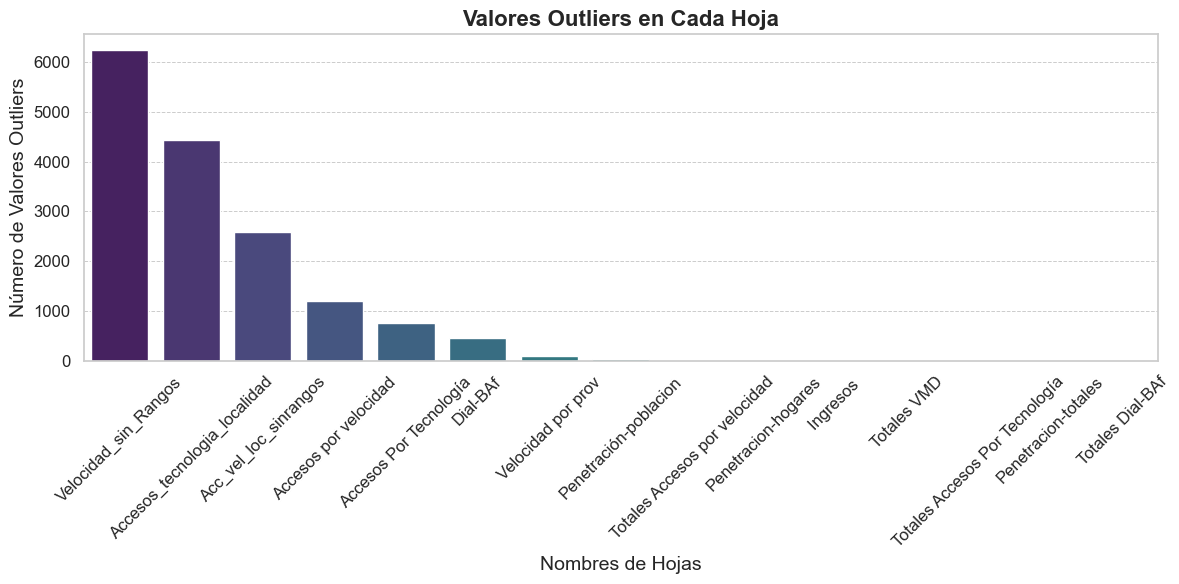

In [26]:
# Función para identificar outliers usando el rango intercuartílico (IQR)
def identificar_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return outliers

# Crear un DataFrame para almacenar la cantidad de outliers por hoja
conteo_outliers = pd.DataFrame(index=dfs.keys(), columns=['valores_outliers'])

# Calcular los valores outliers para cada DataFrame
for nombre_hoja, df in dfs.items():
    outliers = identificar_outliers(df.select_dtypes(include=[np.number]))  # Solo numéricos
    conteo_outliers.loc[nombre_hoja, 'valores_outliers'] = outliers.sum().sum()

# Ordenar los valores outliers
conteo_outliers.sort_values('valores_outliers', ascending=False, inplace=True)
# Graficar los valores outliers
plt.figure(figsize=(12, 6))
sns.barplot(x=conteo_outliers.index, y='valores_outliers', data=conteo_outliers, palette='viridis')

# Ajustes estéticos
plt.xlabel('Nombres de Hojas', fontsize=14)
plt.ylabel('Número de Valores Outliers', fontsize=14)
plt.title('Valores Outliers en Cada Hoja', fontsize=16, weight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()

In [27]:
conteo_outliers.T

,Velocidad_sin_Rangos,Accesos_tecnologia_localidad,Acc_vel_loc_sinrangos,Accesos por velocidad,Accesos Por Tecnología,Dial-BAf,Velocidad por prov,Penetración-poblacion,Totales Accesos por velocidad,Penetracion-hogares,Ingresos,Totales VMD,Totales Accesos Por Tecnología,Penetracion-totales,Totales Dial-BAf
valores_outliers,6237,4427,2580,1202,762,457,105,41,22,20,6,4,3,0,0


Creo que comparar la cantidad de outliers por tabla no tiene mucho sentido, ya que cada una de estas tiene variables, propósitos, distribuciones, escalas y contextos completamente diferentes, sin embargo al formar parte de los análisis "básicos" y obligatorios necesitamos conocer esta estadística en todas las tablas y esta  es la manera más simple, coherentes y cohesiva de hacerlo.

## Análisis espefíficos:

Ya hemos realizado estos análisis generales, los cuales nos sirven como una introducción a nuestro EDA.